In [ ]:
import pandas as pd
import seaborn as sbn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

Preprocesamiento


In [ ]:
bikes_full = pd.read_csv('/content/bikes.csv')
bikes_full

,date,temperature,humidity,windspeed,count
0,2011-01-03,2.716070,45.715346,21.414957,120.000000
1,2011-01-04,2.896673,54.267219,15.136882,108.000000
2,2011-01-05,4.235654,45.697702,17.034578,82.000000
3,2011-01-06,3.112643,50.237349,10.091568,88.000000
4,2011-01-07,2.723918,49.144928,15.738204,148.000000
...,...,...,...,...,...
724,2012-12-27,5.587201,57.755931,28.678187,247.000000
725,2012-12-28,5.545775,54.242931,14.792709,644.000000
726,2012-12-29,4.924888,54.010283,14.777848,575.666667
727,2012-12-30,4.304001,53.777635,14.762987,507.333333


In [ ]:
# Para el analisis estadistico no usaremos la fecha
bikes = bikes_full.drop('date',axis = 1)
bikes

,temperature,humidity,windspeed,count
0,2.716070,45.715346,21.414957,120.000000
1,2.896673,54.267219,15.136882,108.000000
2,4.235654,45.697702,17.034578,82.000000
3,3.112643,50.237349,10.091568,88.000000
4,2.723918,49.144928,15.738204,148.000000
...,...,...,...,...
724,5.587201,57.755931,28.678187,247.000000
725,5.545775,54.242931,14.792709,644.000000
726,4.924888,54.010283,14.777848,575.666667
727,4.304001,53.777635,14.762987,507.333333


In [ ]:
# Mostrar parámetros estadísticos de los datos (media, desviación típica, cuartiles, etc.)
media = np.mean(bikes)
media

temperature     17.762024
humidity        56.514591
windspeed       17.241418
count          622.818930
dtype: float64

In [ ]:
mediana = np.median(bikes)
mediana

33.568495090897216

In [ ]:
varianza = np.var(bikes)
varianza

temperature        79.480651
humidity           53.929746
windspeed          27.235555
count          147222.110275
dtype: float64

In [ ]:
desviacion_tipica = np.std(bikes)
desviacion_tipica

temperature      8.915192
humidity         7.343687
windspeed        5.218769
count          383.695335
dtype: float64

In [ ]:
minimo = bikes.min()
minimo

temperature    -2.2
humidity       21.3
windspeed       5.3
count           2.0
dtype: float64

In [ ]:
maximo = bikes.max()
maximo

temperature      35.1
humidity         75.6
windspeed        35.2
count          1820.0
dtype: float64

In [ ]:
Q1 = np.quantile(bikes,0.25)
Q1

16.996307701789497

In [ ]:
Q3 = np.quantile(bikes,0.75)
Q3

69.98156922879178

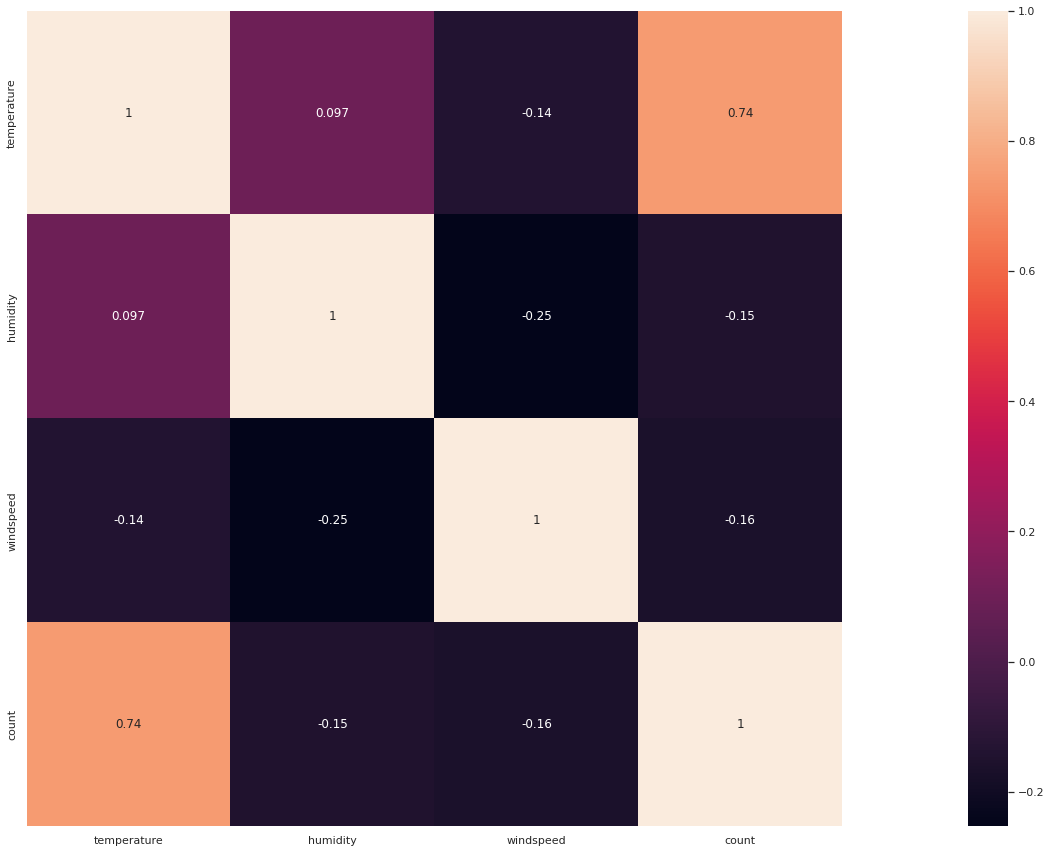

In [ ]:
# Mostrar un mapa de calor que indique la correlación entre variables
sbn.set(rc = {'figure.figsize':(45,15)})
sbn.heatmap(bikes.corr(), square=True, annot=True)

In [ ]:
# Seleccionar las características a tener en cuenta en el estudio
#Se implementa en la parte de optimizacion

In [ ]:
# Separar datos entre entrenamiento y prueba (usando un 75% para entrenamiento y 25% para test)
train = bikes.iloc[0:501,0:]
test = bikes.iloc[501:729,0:]
train

,temperature,humidity,windspeed,count
0,2.716070,45.715346,21.414957,120.000000
1,2.896673,54.267219,15.136882,108.000000
2,4.235654,45.697702,17.034578,82.000000
3,3.112643,50.237349,10.091568,88.000000
4,2.723918,49.144928,15.738204,148.000000
...,...,...,...,...
496,20.778205,57.399180,19.450828,667.666667
497,21.440484,65.386742,18.874352,342.000000
498,23.344571,65.665920,14.216424,625.000000
499,24.586345,60.268528,12.441703,991.000000


In [ ]:
test

,temperature,humidity,windspeed,count
501,20.985200,50.520547,13.462096,1521.000000
502,21.550886,55.879208,15.753897,1224.000000
503,22.116572,61.237869,18.045698,927.000000
504,22.682258,66.596530,20.337498,630.000000
505,23.510124,64.060650,12.131769,819.000000
...,...,...,...,...
724,5.587201,57.755931,28.678187,247.000000
725,5.545775,54.242931,14.792709,644.000000
726,4.924888,54.010283,14.777848,575.666667
727,4.304001,53.777635,14.762987,507.333333


In [ ]:
# Separar datos entre datos de entrada y etiquetas (resultados)
x_train = train.drop('count', axis = 1)
x_test = test.drop('count',axis = 1)
y_train = train['count']
y_test = test['count']

Entrenamiento y prediccion

In [ ]:
# Elegir, instanciar (eligiendo unos valores concretos, por ejemplo k=3 y w=’uniform’) y entrenar el modelo
k = 3
w = 'uniform'

model = KNeighborsRegressor(k, weights=w)
model.fit(x_train, y_train)

# Realizar una predicción con los datos de prueba
y_model = model.predict(x_test)

In [ ]:
# Mostrar el error cuadratico medio
mean_squared_error(y_model,y_test)

104306.32045294563

In [ ]:
#Mostrar el error absoluto medio
mean_absolute_error(y_model,y_test)

257.1427875243665

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


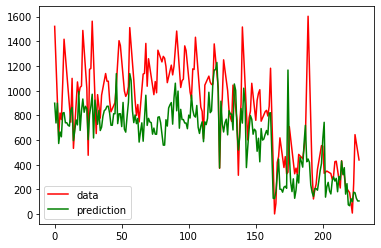

In [ ]:
# Representa graficamente los valores predichos
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx,y_test, c='r', label='data')
plt.plot(xx,y_model, c='g',label = 'prediction')
plt.axis('tight')
plt.legend()
plt.show()

Optimizacion

In [ ]:
def validacion_cruzada_cl(model, x, y, kf):
  fold_accuracy = []
  for train_fold, test_fold in kf.split(x):
 
    x_train_fold = x.iloc[train_fold]
    y_train_fold = y.iloc[train_fold]
    x_test_fold = x.iloc[test_fold]
    y_test_fold = y.iloc[test_fold]

    model.fit(x_train_fold, y_train_fold)
    
    y_pred = model.predict(x_test_fold)
    # evaluación del modelo con error absoluto medio
    acc = mean_absolute_error(y_test_fold, y_pred)
    fold_accuracy.append(acc)
  media_score = sum(fold_accuracy)/len(fold_accuracy)
  return media_score

In [ ]:
kf = KFold(n_splits = 5)

for w in ['uniform','distance']:
  for k in range(1,31):
    model_opti = KNeighborsRegressor(k, weights=w)
    media_cruzada = validacion_cruzada_cl(model_opti,x_train,y_train,kf)
    print("Para k: {k} y w: {w} la media es: {m}".format(k=k,w=w,m=media_cruzada))

Para k: 1 y w: uniform la media es: 200.89145379537956
Para k: 2 y w: uniform la media es: 185.67049504950495
Para k: 3 y w: uniform la media es: 178.71023322332235
Para k: 4 y w: uniform la media es: 174.18078547854785
Para k: 5 y w: uniform la media es: 174.02353069306932
Para k: 6 y w: uniform la media es: 172.3903154565456
Para k: 7 y w: uniform la media es: 169.91349033474776
Para k: 8 y w: uniform la media es: 171.2457547442244
Para k: 9 y w: uniform la media es: 170.0107775944261
Para k: 10 y w: uniform la media es: 169.63908547854786
Para k: 11 y w: uniform la media es: 168.61814716471645
Para k: 12 y w: uniform la media es: 169.7249526952695
Para k: 13 y w: uniform la media es: 169.96104150799692
Para k: 14 y w: uniform la media es: 170.18472960867513
Para k: 15 y w: uniform la media es: 171.4266779977998
Para k: 16 y w: uniform la media es: 171.61413356023098
Para k: 17 y w: uniform la media es: 172.77045000970685
Para k: 18 y w: uniform la media es: 172.14896012101207
Para k

In [ ]:
kf = KFold(n_splits = 5)

for w in ['uniform','distance']:
  for k in range(1,31):
    model_opti = KNeighborsRegressor(k, weights=w)
    media_cruzada = validacion_cruzada_cl(model_opti,x_train,y_train,kf)
    if media_cruzada < 167:
      print("Para k: {k} y w: {w} la media es: {m}".format(k=k,w=w,m=media_cruzada))

Para k: 11 y w: distance la media es: 166.05903361400274
Para k: 12 y w: distance la media es: 166.58680680014405
Para k: 13 y w: distance la media es: 166.7529464187977
